# Финальное задание модуля EDA-4 #

## Популярные статистические тесты в Python ##

Описание задания приведено в файле [README.md](README.md)

In [1]:
import pandas as pd
from scipy.stats import shapiro, normaltest, pearsonr
# from scipy.stats import ttest_ind
# from numpy.random import rand
# from scipy.stats import spearmanr
from scipy.stats import f_oneway
# from statsmodels.stats import weightstats
# from statsmodels.stats.proportion import proportions_ztest

### Исходные массивы данных ###

In [2]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

### 1) Объединение двух массивов в DataFrame ###

In [3]:
petersburg_ser = pd.Series(data=petersburg, dtype=float, name='petersburg')
magadan_ser = pd.Series(data=magadan, dtype=float, name='magadan')
main_df = pd.DataFrame(data={'petersburg': petersburg_ser, 'magadan': magadan_ser})
display(main_df)
display(main_df.info())
display(main_df.describe())

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petersburg  7 non-null      float64
 1   magadan     8 non-null      float64
dtypes: float64(2)
memory usage: 256.0 bytes


None

,petersburg,magadan
count,7.000000,8.000000
mean,0.103443,0.078012
std,0.016209,0.012945
min,0.081700,0.067700
25%,0.097100,0.068800
50%,0.101600,0.073050
75%,0.105700,0.081450
max,0.135200,0.103300


В данных по Санкт-Петербургу не хватает данных. Можно в отдельном датафрейме заполнить пустые ячейки средним значением.

In [4]:
full_df = main_df.copy()
full_df['petersburg'].fillna(round(full_df['petersburg'].mean(), 4), inplace=True)
display(full_df)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1034,0.0689


### 2) Обоснование выбора теста на корелляцию ###

Поскольку данных немного, то в данном случае для проверки нормального распределения достаточно теста Шапиро-Уилка.

Уровень значимости определяется из следующих соображений. Эмпирически, нулевая гипотеза о нормальном распределении размера мидий конкретной популяции выглядит "естественно" правдоподобной, как и нормальное распределение человеческого роста. Однако данных настолько мало (для экпериментальной проверки научной гипотезы 7-8 измерений&nbsp;&mdash; ни о чём), что любые отклонения от ожидаемого результата могут быть существенными. Действительно&nbsp;&mdash; в обеих выборках данных среднеквадратичное отклонение составляет около 16% от среднего значения (которое примем как ожидаемое). То есть, измеренные значения могут в среднем отклоняться от ожидаемого примерно на 40% (из простой оценки $\sqrt{0,16}=0,4$).

Проведём небольшой эксперимент. Сравним результат теста Шапиро-Уилка для исходных 7 измерений Санкт-Петербурга и для 8 измерений с добавленным средним арифметическим значением. Для Магадана берём имеющиеся 8 измерений.

In [8]:
stat, p7 = shapiro(petersburg)
print(f'Для Санкт-Петербурга (7 изм.) p = {round(p7, 3)}')
stat, p8 = shapiro(main_df['petersburg'])
print(f'Для Санкт-Петербурга (8 изм.) p = {round(p8, 3)}')
stat, pm = shapiro(magadan)
print(f'Для Магадана p = {round(pm, 3)}')

Для Санкт-Петербурга (7 изм.) p = 0.242
Для Санкт-Петербурга (8 изм.) p = 1.0
Для Магадана p = 0.036


Видно, как драматически меняется $p$ при добавлении всего одного измерения.

Поэтому предлагается волевым решением принять достаточно грубый уровень значимости $\alpha=0,25$, и считать оба распределения нормальными.

In [17]:
# t1_df = main_df.copy()
# stat, pp = shapiro(t1_df['petersburg'])
# stat, pp = shapiro(petersburg)
# print(f'Для Санкт-Петербурга p = {round(pp, 3)}')
# stat, pm = shapiro(t1_df['magadan'])
# stat, pm = shapiro(magadan)
# print(f'Для Магадана p = {round(pm, 3)}')

# -----=====!!!!!!!!!!=====----- #

Столбец Санкт-Петербурга не укладывается в уровень значимости, и по-хорошему надо было бы проводить непараметрические тесты. Но, поскольку данных крайне мало (и любые погрешности могут быть значительны), то можно попробовать считать распределение нормальным (волевым усилием "подкрутить" уровень значимости до $\alpha=0,15$). Следовательно, можно проводить параметрические корелляционные тесты. Для наглядности можно дополнительно проверить, насколько данные отклоняются от нормального распределения.

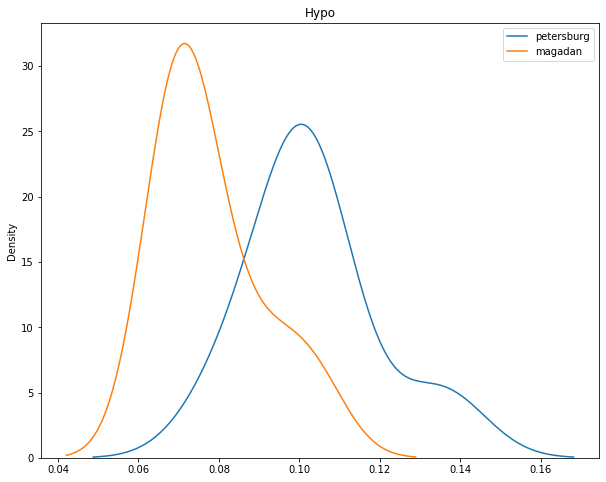

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Проверка нормальности')
sns.kdeplot(petersburg, ax=ax1, label='petersburg')
sns.kdeplot(magadan, ax=ax1, label='magadan')
plt.legend();

Размеры мидий являются непрерывными переменными. Значит проведём параметрический тест на корелляцию Пирсона.

### 3) Тест на корелляцию ###

Тест Пирсона стандартным методом **Pandas** продублируем методом из **ScyPy**. Заодно убедимся, что они равнозначны.

In [27]:
main_df.corr()

,petersburg,magadan
petersburg,1.000000,0.244845
magadan,0.244845,1.000000


In [28]:
corr, p = pearsonr(main_df['petersburg'], main_df['magadan'], alternative='two-sided')
print(f'Коэффициент корелляции = {round(corr, 6)}')

Коэффициент корелляции = 0.244845


### 4) Вывод по гипотезе ###

1. Распределение по обоим наборам данных принимаем нормальным. Выглядит, как подгонка результатов, и тем не менее. На таком малом объёме измерений.
2. Коэффициент корелляции <&nbsp;0,3. То есть связь очень слабая или отсутствует.

### 5) Тест на сравнение выборок ###

In [32]:
stat, p = f_oneway(petersburg, magadan)
print(f'p = {p}')

p = 0.004940324868384317


### 6) Обоснование выбоа теста на сравнение ###

### 7) Вывод по гипотезе ###

Является ли найденная разность средних значений статистически значимой?

Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.